In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_california_housing

In [8]:
data = fetch_california_housing()

In [11]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [12]:
# Problem Statement >> To Predict the House value for the California District

In [14]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [15]:
data.target_names

['MedHouseVal']

In [16]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [17]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [19]:
# Dataframe
df = pd.DataFrame(data.data, columns = data.feature_names)

In [20]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [21]:
df['price'] = data.target

In [22]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [25]:
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
1281,2.2361,47.0,4.941476,1.094148,1074.0,2.732824,38.01,-121.81,1.051


In [26]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [27]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

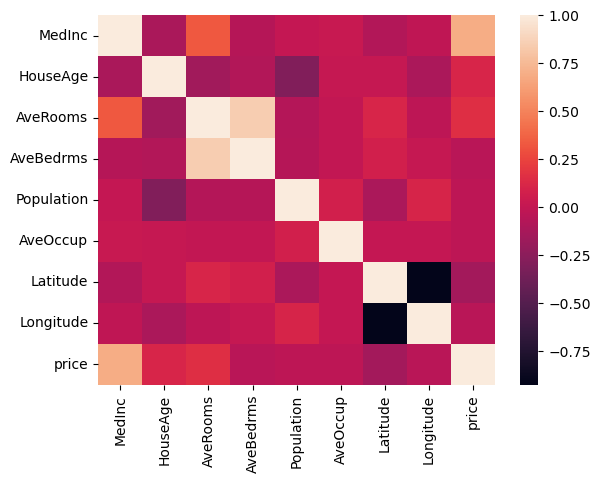

In [30]:
sns.heatmap(df.corr())

In [34]:
# Seperating data into x & y
x = df.drop('price', axis = 1)
y = df['price']

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [36]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [39]:
# Scaling (Optional)
# y should not be scaled
# Fit Transform on Train Data
# Transform on Test Data

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:
x_train, x_test

(array([[-0.25755151,  0.27107822,  0.05385116, ..., -0.01793198,
          1.38666374, -0.8579441 ],
        [-0.80605755,  1.85976996,  0.22316306, ..., -0.05444938,
          2.31260141, -2.33169717],
        [ 1.27641143, -1.79422103,  0.5758485 , ..., -0.04140825,
         -0.07706601,  0.32703303],
        ...,
        [-1.45467719,  1.06542409, -0.21405335, ..., -0.0388299 ,
         -0.79723975,  0.65564013],
        [-0.66033663, -1.47648268, -0.17459892, ..., -0.02809716,
         -0.89076881,  1.20331863],
        [-0.83439658,  0.50938198, -0.31981067, ..., -0.04366227,
          1.00787106, -1.3060447 ]]),
 array([[-0.33308696,  0.82712033, -0.3657131 , ..., -0.11129301,
         -0.73644587,  0.60585117],
        [-1.00665555,  0.66825116, -0.17578447, ..., -0.04179104,
          0.53554932, -0.10115199],
        [ 0.07118132,  1.38316244, -0.37467759, ...,  0.05580001,
          0.97981234, -1.4155804 ],
        ...,
        [-0.73242902, -0.99987516,  0.18494003, ...,  

In [45]:
# Model Training
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [46]:
model

LinearRegression()

In [47]:
model.fit(x_train, y_train)

LinearRegression()

In [48]:
model.coef_

array([ 0.83167028,  0.12159502, -0.26758589,  0.30983997, -0.00518054,
       -0.04040421, -0.90736902, -0.88212727])

In [49]:
model.intercept_

2.0777066737726098

In [50]:
y_pred = model.predict(x_test)

In [51]:
y_pred

array([2.12391852, 0.93825754, 2.7088455 , ..., 1.24263061, 2.73771901,
       1.75800594])

In [53]:
# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [55]:
mean_squared_error(y_test, y_pred)

0.5356532845422557

In [56]:
mean_absolute_error(y_test, y_pred)

0.5351008445282478

In [57]:
r2_score(y_test, y_pred)

0.59298692857601

In [58]:
error = y_test - y_pred

<Axes: xlabel='price', ylabel='Density'>

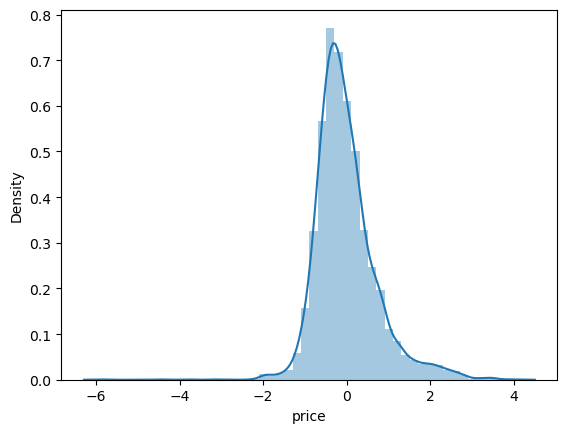

In [59]:
sns.distplot(error)

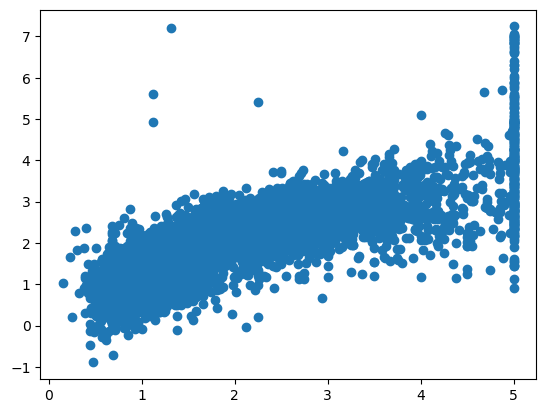

In [60]:
plt.scatter(y_test, y_pred)

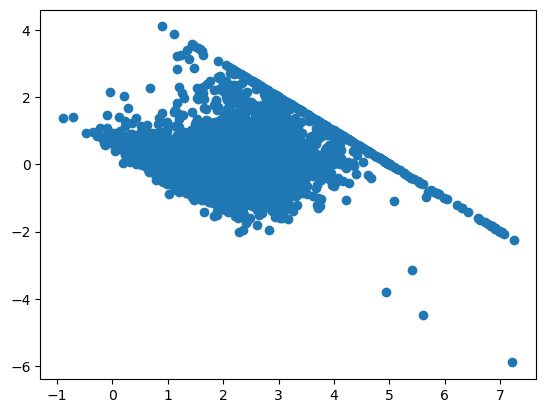

In [61]:
plt.scatter(y_pred, error)